## Aula 01 - Dados Textuais: classificação e exploração.

In [2]:
import pandas as pd

df = pd.read_csv("../data/imdb-reviews-pt-br.csv", index_col='id')
df.head()

,text_en,text_pt,sentiment
id,,,
1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg


In [3]:
from sklearn.model_selection import train_test_split

X_train, y_train, x_test, y_test = train_test_split(df.text_pt,
                                                    df.sentiment,
                                                    random_state = 42)

In [4]:
from sklearn.linear_model import LogisticRegression

#rl = LogisticRegression()
#rl.fit(X_train, y_train)
#accuracy = rl.score(x_test, y_test)
#print(acuracia)

In [5]:
print("Negativa \n")
print(df.text_pt[189])

Negativa 

O filme é uma canção de ninar feliz, foi feito para nos fazer dormir. E é isso que fazemos, enquanto sonhamos com a bela Natasha Henstridge. Nenhum roteiro, nenhum personagem profundo, nada de especial. Então, vamos dormir.


In [6]:
print("Positivo \n")
df.text_pt[49002]

Positivo 



'Quinze anos depois e Paris Is Burning ainda está em chamas. Este é um clássico dos filmes gays negros, junto com os outros filmes homossexuais negros honorários, The Color Purple e Mahoganoy. Este trabalho seminal captura underground e underclass ou seja, "underserved cultura gay negra e latina e comunidade como nenhum outro trabalho antes ou depois, incluindo todas as retrospectivas e renderings homossexuais sentimentais do Harlem Renascimento. Eles são bons, mas este é o melhor desafio eu digo o único" Um filme real que você vai encontrar sobre o assunto. Sua implacável Cunty, a clássica música house, se torna aclamada por Hollywood, um acampamento hilariante e inimaginável, como só nós fazemos e crítica social. Tudo isso por uma diretora branca que obviamente deve ter sido uma irmã Gurl ou Mizz Thing em uma vida anterior Eu poderia continuar, mas acho que você entendeu o ponto: amo este filme!'

In [7]:
df.sentiment.value_counts()

neg    24765
pos    24694
Name: sentiment, dtype: int64

In [8]:
df.head()

,text_en,text_pt,sentiment
id,,,
1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg


In [9]:
df["sentiment"].replace(["neg", "pos"], [0,1], inplace=True)

## Aula 2 - Bag of Words: criando representações da linguagem humana.

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

text = ["Assisti um filme ótimo", "Assisti um filme ruim"]

vector = CountVectorizer(lowercase=False)
bag_of_words = vector.fit_transform(text)

In [11]:
vector.get_feature_names_out()

array(['Assisti', 'filme', 'ruim', 'um', 'ótimo'], dtype=object)

In [12]:
bag_of_words

<2x5 sparse matrix of type '<class 'numpy.int64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [13]:
sparse_matrix = pd.DataFrame.sparse.from_spmatrix(bag_of_words,
                      columns=vector.get_feature_names_out())

In [14]:
sparse_matrix

,Assisti,filme,ruim,um,ótimo
0,1,1,0,1,1
1,1,1,1,1,0


In [15]:
vetorizar = CountVectorizer(lowercase=False, max_features=50)
bag_of_words = vetorizar.fit_transform(df.text_pt)
bag_of_words.shape

(49459, 50)

In [16]:
from wordcloud import WordCloud

all_words = ' '.join(df.text_pt)
len(all_words)

63448424

In [17]:
wordcloud = WordCloud(width=800, height=500, max_font_size=110, collocations=False).generate(all_words)

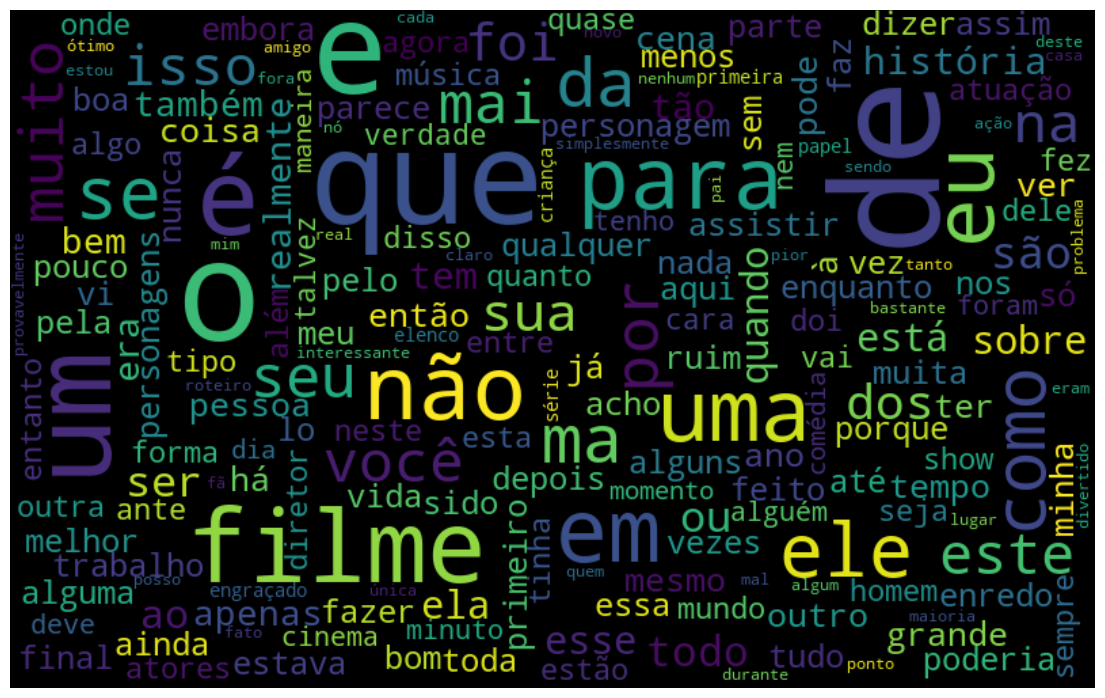

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,10))
plt.axis('off')
plt.imshow(wordcloud, interpolation='bilinear')

In [19]:
pos_words = ' '.join(df[df.sentiment == 1].text_pt)
len(pos_words)

31844231

In [20]:
neg_words = ' '.join(df[df.sentiment == 0].text_pt)
len(neg_words)

31604192

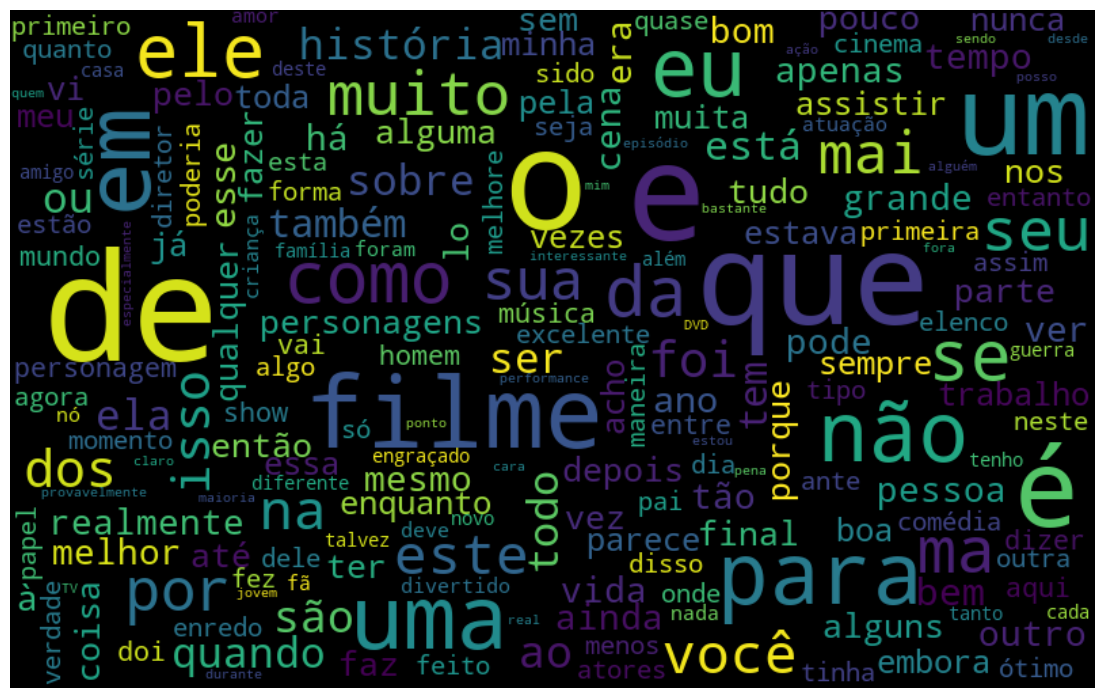

In [21]:
wordcloud_pos = WordCloud(width=800, height=500, max_font_size=110, collocations=False).generate(pos_words)

plt.figure(figsize=(14,10))
plt.axis('off')
plt.imshow(wordcloud_pos, interpolation='bilinear')

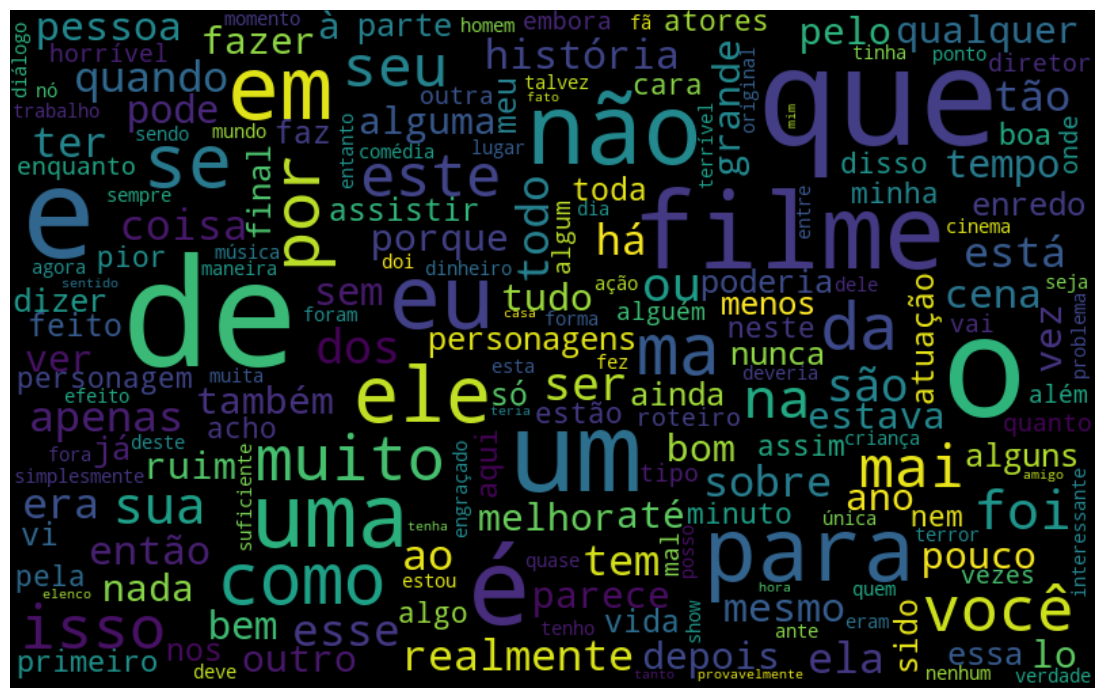

In [22]:
wordcloud_neg = WordCloud(width=800, height=500, max_font_size=110, collocations=False).generate(neg_words)

plt.figure(figsize=(14,10))
plt.axis('off')
plt.imshow(wordcloud_neg, interpolation='bilinear')

In [23]:
import nltk

In [24]:
example = ['A good movie', 'A bad Movie']

freq = nltk.FreqDist(example)
freq

FreqDist({'A good movie': 1, 'A bad Movie': 1})

In [25]:
from nltk import tokenize

example = 'Welcome to the NLP world!'

token = tokenize.WhitespaceTokenizer()

In [26]:
token_ex = token.tokenize(example)
token_ex

['Welcome', 'to', 'the', 'NLP', 'world!']

In [27]:
token_ex = token.tokenize(all_words)
freq = nltk.FreqDist(token_ex)
freq

FreqDist({'de': 417651, 'que': 325070, 'e': 299743, 'o': 244881, 'um': 216410, 'a': 210179, 'é': 192381, 'em': 132778, 'uma': 130888, 'não': 127915, ...})

In [28]:
df_freq = pd.DataFrame({'Words':list(freq.keys()), 'Freq':list(freq.values())}).sort_values('Freq', ascending=False)
df_freq.head(10)

,Words,Freq
20,de,417651
14,que,325070
42,e,299743
3,o,244881
7,um,216410
102,a,210179
45,é,192381
200,em,132778
1,uma,130888
29,não,127915


In [29]:
import seaborn as sns

<AxesSubplot: xlabel='Words', ylabel='Freq'>

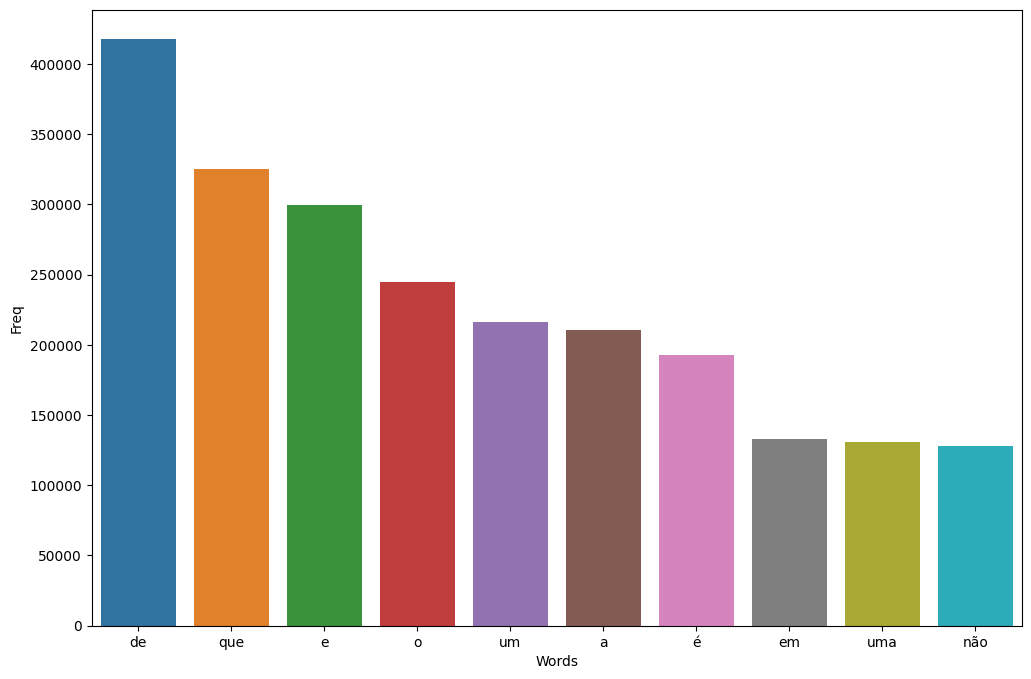

In [30]:
plt.figure(figsize=(12,8))
ax = sns.barplot(data=df_freq.head(10), x='Words', y='Freq')
ax

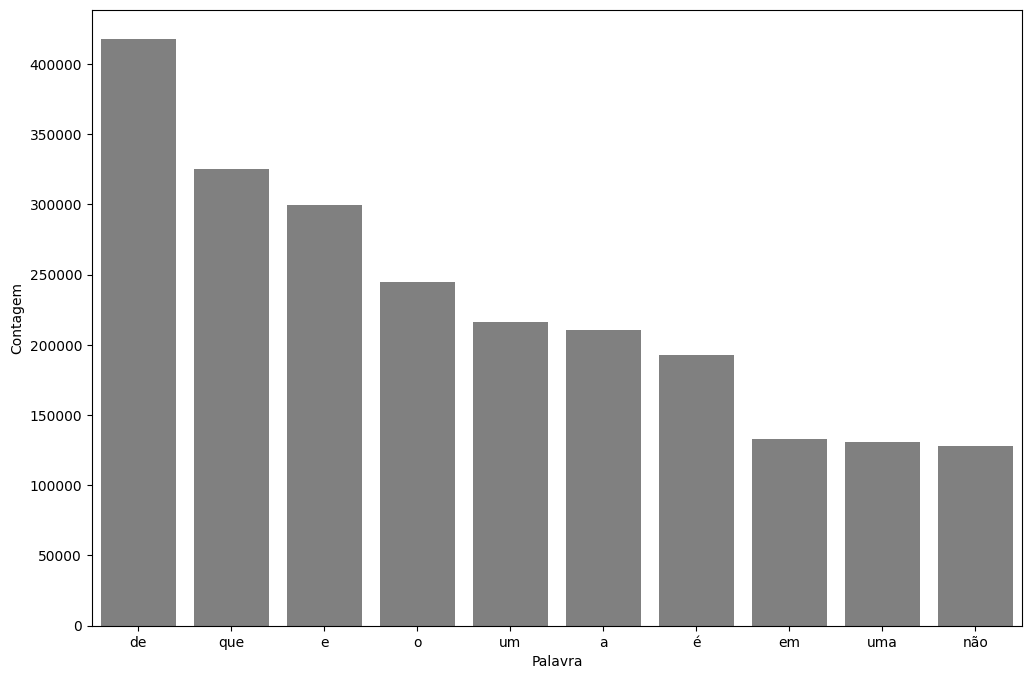

In [31]:
def pareto(texto, coluna_texto, quantidade):
    todas_palavras = ' '.join([texto for texto in texto[coluna_texto]])
    token_frase = token.tokenize(todas_palavras)
    frequencia = nltk.FreqDist(token_frase)
    df_frequencia = pd.DataFrame({"Palavra": list(frequencia.keys()),
                                   "Frequência": list(frequencia.values())})
    df_frequencia = df_frequencia.nlargest(columns = "Frequência", n = quantidade)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequencia, x = "Palavra", y = "Frequência", color = 'gray')
    ax.set(ylabel = "Contagem")
    plt.show()

pareto(df, "text_pt", 10)

In [32]:
stop_words = nltk.corpus.stopwords.words('portuguese')

In [33]:
palavras_irrelevantes = nltk.corpus.stopwords.words("portuguese")

frase_processada = list()

for opiniao in df.text_pt:
    nova_frase = list()
    palavras_texto = token.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in palavras_irrelevantes:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))

df["process_1"] = frase_processada

In [34]:
df.head()

,text_en,text_pt,sentiment,process_1
id,,,,
1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",0,"Mais vez, Sr. Costner arrumou filme tempo nece..."
2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,0,Este exemplo motivo maioria filmes ação mesmos...
3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",0,"Primeiro tudo odeio raps imbecis, poderiam agi..."
4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,0,Nem Beatles puderam escrever músicas todos gos...
5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,0,"Filmes fotos latão palavra apropriada eles, ve..."


In [35]:
all_words_p1 = ' '.join(df.process_1)
token_p1 = token.tokenize(all_words_p1)

freq = nltk.FreqDist(token_p1)
freq

FreqDist({'filme': 117543, 'Eu': 51485, 'O': 44924, 'ser': 32696, 'A': 31547, '-': 28767, 'sobre': 28626, 'filmes': 27619, 'tão': 24790, 'realmente': 23673, ...})

In [39]:
vector = CountVectorizer(lowercase=False, max_features=50)
bag_of_words = vetorizar.fit_transform(df.process_1)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(bag_of_words,
                                                    df.sentiment,
                                                    random_state = 42)

In [46]:
rl = LogisticRegression()
rl.fit(X_train, y_train)

accuracy = rl.score(X_test, y_test)
print(accuracy)

0.6607359482410028


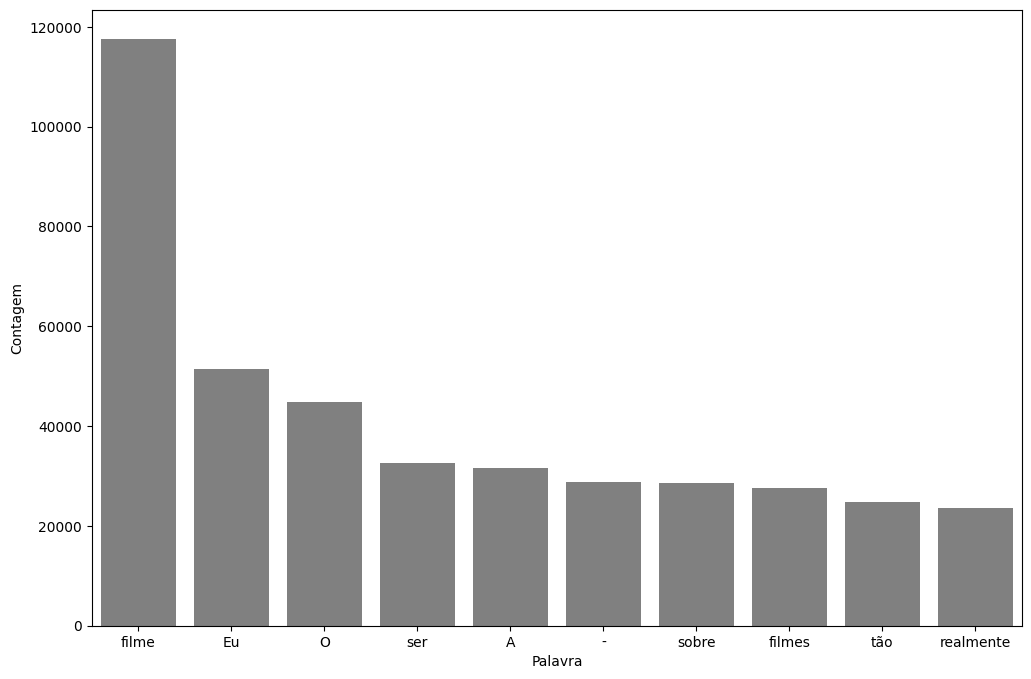

In [47]:
pareto(df, "process_1", 10)